In [ ]:
!pip install huggingface_hub(cli)
!pip install utilsforecast
!pip install praxis
!pip install paxml
!pip install jax[cuda12]==0.4.26
!pip install einshape
!pip install timesfm[pax]

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install huggingface_hub(cli)'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of praxis to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is still looking at multiple versions of praxis to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install praxis==0.1, praxis==0.2.0, praxis==0.2.1, praxis==0.3.0, praxis==0.4.0, praxis==1.0.0, praxis==1.1.0, praxis==1.2.0, praxis==1.3.0, praxis==1.3.1 and pra

In [ ]:
import timesfm
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0].


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head(10)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
5,2007-12-15,7.783641
6,2007-12-16,8.414052
7,2007-12-17,8.829226
8,2007-12-18,8.382518
9,2007-12-19,8.069655


In [ ]:
print(df.tail(10))
print(df.shape)

              ds          y
2895  2016-01-11   8.470730
2896  2016-01-12   8.135054
2897  2016-01-13   8.067149
2898  2016-01-14   8.023552
2899  2016-01-15   8.021913
2900  2016-01-16   7.817223
2901  2016-01-17   9.273878
2902  2016-01-18  10.333775
2903  2016-01-19   9.125871
2904  2016-01-20   8.891374
(2905, 2)


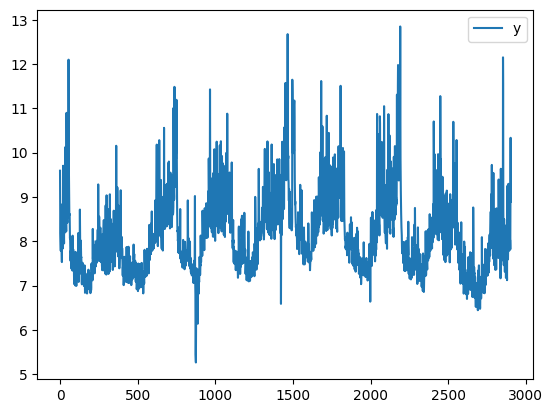

In [ ]:
df.plot()
plt.show()

In [ ]:
#df = df.reset_index()
#df.rename(columns={'Date': 'ds'}, inplace=True)


df['unique_id']='simple_data'
df['ds'] = pd.to_datetime(df['ds'])

df = df.set_index('ds').sort_index()

# Tworzymy pełny zakres dat (dni) od najmniejszej do największej daty w df:
full_idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Sprawdzamy, które daty z tego zakresu nie występują w df:
missing_dates = full_idx.difference(df.index)

print(f"Brakuje {len(missing_dates)} dni:")
print(missing_dates)

Brakuje 59 dni:
DatetimeIndex(['2008-01-31', '2008-02-28', '2008-03-01', '2008-03-03',
               '2008-03-04', '2008-06-01', '2008-06-02', '2008-07-01',
               '2008-07-13', '2008-07-14', '2008-07-15', '2008-07-16',
               '2008-07-17', '2008-07-18', '2008-07-19', '2008-07-20',
               '2008-07-21', '2008-07-22', '2008-07-23', '2008-07-24',
               '2008-07-25', '2008-07-26', '2008-07-27', '2008-07-28',
               '2008-07-29', '2008-07-30', '2008-07-31', '2008-10-21',
               '2008-10-22', '2009-09-23', '2009-09-25', '2009-09-26',
               '2009-09-27', '2009-10-14', '2009-10-15', '2009-10-16',
               '2009-11-15', '2009-11-22', '2010-01-23', '2010-01-24',
               '2010-02-08', '2010-02-23', '2010-06-26', '2010-06-28',
               '2010-07-05', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-10', '2011-09-02', '2011-10-20', '2011-12-24',
               '2011-12-25', '2012-04-30', '2013-07-23', '201

In [ ]:
# Reindeksujemy df do pełnego zakresu dni:
df_full = df.reindex(full_idx)

# Kolumnę unique_id wypełniamy zgodnie z istniejącą wartością:
df_full['unique_id'] = df_full['unique_id'].fillna(method='ffill')  # lub .fillna('simple_data')
df_full['y'] = df_full['y'].fillna(method='ffill')

missing_dates = full_idx.difference(df_full.index)

print(f"Brakuje {len(missing_dates)} dni:")
print(missing_dates)

Brakuje 0 dni:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


<ipython-input-17-6d1ff3c881cb>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_full['unique_id'] = df_full['unique_id'].fillna(method='ffill')  # lub .fillna('simple_data')
<ipython-input-17-6d1ff3c881cb>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_full['y'] = df_full['y'].fillna(method='ffill')


In [ ]:
df_full = df_full.reset_index().rename(columns={'index': 'ds'})

print(df_full.head(10))
print(df_full.tail(10))

          ds         y    unique_id
0 2007-12-10  9.590761  simple_data
1 2007-12-11  8.519590  simple_data
2 2007-12-12  8.183677  simple_data
3 2007-12-13  8.072467  simple_data
4 2007-12-14  7.893572  simple_data
5 2007-12-15  7.783641  simple_data
6 2007-12-16  8.414052  simple_data
7 2007-12-17  8.829226  simple_data
8 2007-12-18  8.382518  simple_data
9 2007-12-19  8.069655  simple_data
             ds          y    unique_id
2954 2016-01-11   8.470730  simple_data
2955 2016-01-12   8.135054  simple_data
2956 2016-01-13   8.067149  simple_data
2957 2016-01-14   8.023552  simple_data
2958 2016-01-15   8.021913  simple_data
2959 2016-01-16   7.817223  simple_data
2960 2016-01-17   9.273878  simple_data
2961 2016-01-18  10.333775  simple_data
2962 2016-01-19   9.125871  simple_data
2963 2016-01-20   8.891374  simple_data


In [ ]:
n = len(df_full)
train_end = int(n * 0.70)
valid_end = train_end + int(n * 0.20)

# 3. Podział
train_df = df_full.iloc[:train_end]
valid_df = df_full.iloc[train_end:valid_end]
test_df  = df_full.iloc[valid_end:]

# 4. (opcjonalnie) sanity check:
assert len(train_df) + len(valid_df) + len(test_df) == n


In [ ]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.6 MB/s eta 0:00:00


In [ ]:
import optuna
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
import timesfm


# --- 1. checkpoint raz na zewnątrz ---
checkpoint = timesfm.TimesFmCheckpoint(
    huggingface_repo_id="google/timesfm-2.0-500m-pytorch"
)

def objective(trial):
    # 2. proponowane hiperparametry
    context_len = trial.suggest_int("context_len", 256, 2048, step=32)
    horizon_len = trial.suggest_int("horizon_len", 16, 128, step=16)
    batch_size  = trial.suggest_categorical("per_core_batch_size", [16,32,64])

    # 3. inicjalizacja modelu
    hparams = timesfm.TimesFmHparams(
        backend="gpu",
        per_core_batch_size=batch_size,
        context_len=context_len,
        horizon_len=horizon_len,
        # zachowujemy resztę architektury
        input_patch_len=32,
        output_patch_len=128,
        num_layers=50,
        model_dims=1280,
        use_positional_embedding=False,
    )
    tfm = timesfm.TimesFm(hparams=hparams, checkpoint=checkpoint)

    # 4. zero-shot forecast i ewaluacja na pierwszych horizon_len dni valid_df
    #    (forecast_on_df zwraca dokładnie horizon_len prognoz)
    fc = tfm.forecast_on_df(
        inputs=train_df,
        freq="1D",
        value_name="y",
        num_jobs=-1
    )
    # wyciągamy tylko te ds/y z forecastu
    # fc ma kolumny ['ds','unique_id','timesfm']
    subtest = valid_df.iloc[:horizon_len]
    merged = pd.merge(
        subtest[['ds','y']],
        fc[['ds','timesfm']],
        on='ds', how='inner'
    )
    # jeśli za mało punktów, karzemy trial
    if len(merged) < horizon_len // 2:
        return float("inf")
    mape = mean_absolute_percentage_error(
        merged['y'].values,
        merged['timesfm'].values
    )
    return mape

# 5. uruchamiamy Optunę
study = optuna.create_study(
    direction="minimize",
    sampler=optuna.samplers.TPESampler(),
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
)
study.optimize(objective, n_trials=20)

print("Best MAPE:", study.best_value)
print("Best params:", study.best_params)


[I 2025-05-19 12:34:04,938] A new study created in memory with name: no-name-e27b7776-0404-42c5-8e38-75be54e36410


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:34:31,171] Trial 0 finished with value: 0.060903246956957625 and parameters: {'context_len': 1184, 'horizon_len': 80, 'per_core_batch_size': 16}. Best is trial 0 with value: 0.060903246956957625.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:35:23,246] Trial 1 finished with value: 0.07823232669167074 and parameters: {'context_len': 1792, 'horizon_len': 64, 'per_core_batch_size': 32}. Best is trial 0 with value: 0.060903246956957625.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:35:42,528] Trial 2 finished with value: 0.06283235175983966 and parameters: {'context_len': 992, 'horizon_len': 48, 'per_core_batch_size': 16}. Best is trial 0 with value: 0.060903246956957625.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:36:53,546] Trial 3 finished with value: 0.06735426771283241 and parameters: {'context_len': 1632, 'horizon_len': 96, 'per_core_batch_size': 64}. Best is trial 0 with value: 0.060903246956957625.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:37:12,146] Trial 4 finished with value: 0.06473385878765427 and parameters: {'context_len': 1024, 'horizon_len': 48, 'per_core_batch_size': 16}. Best is trial 0 with value: 0.060903246956957625.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:37:40,995] Trial 5 finished with value: 0.05989375676390422 and parameters: {'context_len': 1088, 'horizon_len': 96, 'per_core_batch_size': 32}. Best is trial 5 with value: 0.05989375676390422.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:38:09,647] Trial 6 finished with value: 0.05977188375618546 and parameters: {'context_len': 1056, 'horizon_len': 128, 'per_core_batch_size': 32}. Best is trial 6 with value: 0.05977188375618546.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:38:21,412] Trial 7 finished with value: 0.12661847200018622 and parameters: {'context_len': 352, 'horizon_len': 80, 'per_core_batch_size': 16}. Best is trial 6 with value: 0.05977188375618546.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:38:56,581] Trial 8 finished with value: 0.020584659712478068 and parameters: {'context_len': 704, 'horizon_len': 16, 'per_core_batch_size': 64}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:39:17,888] Trial 9 finished with value: 0.043165897903633774 and parameters: {'context_len': 992, 'horizon_len': 32, 'per_core_batch_size': 16}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:39:40,003] Trial 10 finished with value: 0.02252451012815143 and parameters: {'context_len': 352, 'horizon_len': 16, 'per_core_batch_size': 64}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:39:59,067] Trial 11 finished with value: 0.02330950867836991 and parameters: {'context_len': 288, 'horizon_len': 16, 'per_core_batch_size': 64}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:40:31,187] Trial 12 finished with value: 0.030784759599463588 and parameters: {'context_len': 608, 'horizon_len': 16, 'per_core_batch_size': 64}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:41:03,714] Trial 13 finished with value: 0.020858944979375807 and parameters: {'context_len': 640, 'horizon_len': 16, 'per_core_batch_size': 64}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:41:38,438] Trial 14 finished with value: 0.03818975211913721 and parameters: {'context_len': 672, 'horizon_len': 32, 'per_core_batch_size': 64}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:42:12,684] Trial 15 finished with value: 0.03818975211913721 and parameters: {'context_len': 672, 'horizon_len': 32, 'per_core_batch_size': 64}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:43:15,000] Trial 16 finished with value: 0.05961489205286618 and parameters: {'context_len': 1408, 'horizon_len': 48, 'per_core_batch_size': 64}. Best is trial 8 with value: 0.020584659712478068.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:43:54,353] Trial 17 finished with value: 0.020363788071914145 and parameters: {'context_len': 800, 'horizon_len': 16, 'per_core_batch_size': 64}. Best is trial 17 with value: 0.020363788071914145.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:45:21,446] Trial 18 finished with value: 0.05533756867098628 and parameters: {'context_len': 2048, 'horizon_len': 128, 'per_core_batch_size': 64}. Best is trial 17 with value: 0.020363788071914145.


Finished forecasting.


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


[I 2025-05-19 12:46:01,716] Trial 19 finished with value: 0.07231573983501269 and parameters: {'context_len': 832, 'horizon_len': 64, 'per_core_batch_size': 64}. Best is trial 17 with value: 0.020363788071914145.


Finished forecasting.
Best MAPE: 0.020363788071914145
Best params: {'context_len': 800, 'horizon_len': 16, 'per_core_batch_size': 64}


In [ ]:
horizon_len = study.best_params["horizon_len"]

hparams = timesfm.TimesFmHparams(
    backend="gpu",
    per_core_batch_size=study.best_params["per_core_batch_size"],
    context_len=study.best_params["context_len"],
    horizon_len=horizon_len,
    input_patch_len=32,
    output_patch_len=128,
    num_layers=50,
    model_dims=1280,
    use_positional_embedding=False,
)
tfm_best = timesfm.TimesFm(hparams=hparams, checkpoint=checkpoint)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.


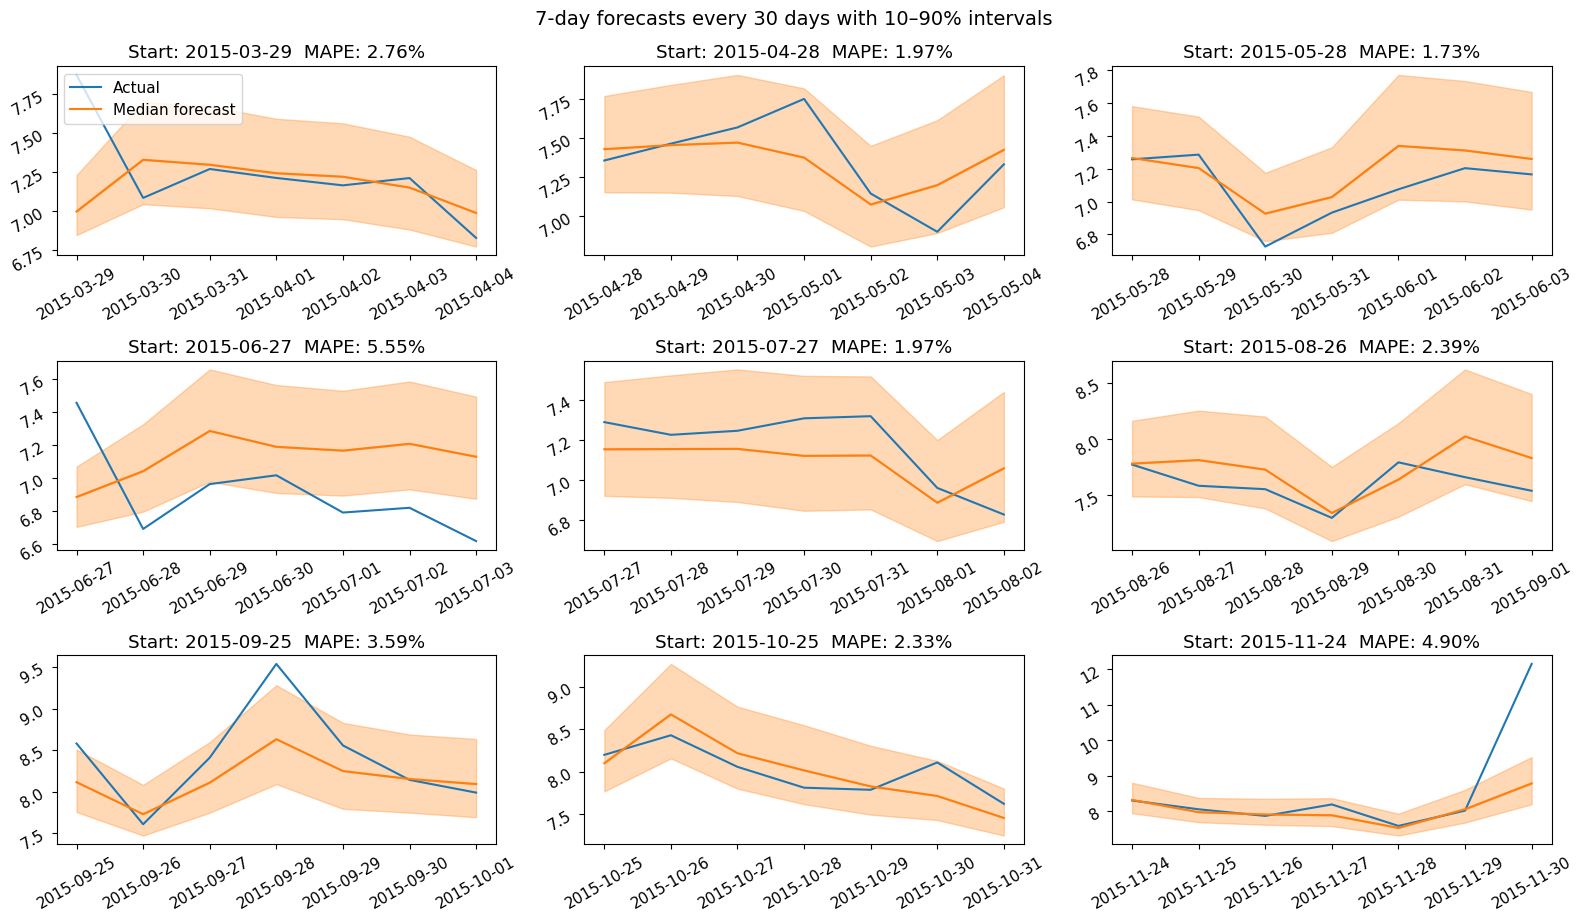

Average 7-day MAPE across windows: 3.02%


In [ ]:
# --- 1. przygotowanie listy startów okien co 30 dni (9 okien) ---
date_list = pd.date_range(
    start=test_df['ds'].iloc[0],
    periods=9,
    freq="30D"
).tolist()

# --- 2. kontenery na dane do wykresów ---
zs_mapes     = []
zs_forecasts = []  # każdy element: (ds, median, lower10, upper90)
zs_actuals   = []  # każdy element: (ds, actual_values)

# --- 3. pętla po datach startowych ---
for d in date_list:
    # a) historia do momentu d
    history = df_full[df_full['ds'] < d]
    # b) prognoza całego horizon (ale później weźmiemy tylko 7 dni)
    forecast_df = tfm_best.forecast_on_df(
        inputs=history,
        freq="1D",
        value_name="y",
        num_jobs=-1
    )
    # c) wycinek prognozy na kolejne 7 dni od d
    mask_fc = (
        (forecast_df['ds'] >= d) &
        (forecast_df['ds'] <  d + pd.Timedelta(days=7))
    )
    fc7 = forecast_df.loc[mask_fc].sort_values('ds').reset_index(drop=True)

    # d) faktyczne wartości w tych samych dniach
    mask_act = (
        (test_df['ds'] >= d) &
        (test_df['ds'] <  d + pd.Timedelta(days=7))
    )
    act7 = test_df.loc[mask_act].sort_values('ds').reset_index(drop=True)

    # e) wyciągamy kwantyle i medianę
    ds        = fc7['ds']
    lower10   = fc7['timesfm-q-0.1']
    median50  = fc7['timesfm-q-0.5']   # lub fc7['timesfm']
    upper90   = fc7['timesfm-q-0.9']

    # f) MAPE na medianie
    mape = mean_absolute_percentage_error(act7['y'], median50) * 100
    zs_mapes.append(mape)

    # g) zachowujemy do wykresu
    zs_forecasts.append((ds, median50, lower10, upper90))
    zs_actuals.append((act7['ds'], act7['y']))

# --- 4. rysowanie 3×3 subplotów z pasmami niepewności ---
plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 11})

for idx, ((ds_fc, med, l10, u90), (ds_act, y_act), start, mape) in enumerate(
    zip(zs_forecasts, zs_actuals, date_list, zs_mapes)
):
    ax = plt.subplot(3, 3, idx+1)
    # prawdziwe wartości
    ax.plot(ds_act, y_act,           label='Actual', color='C0')
    # mediana prognozy
    ax.plot(ds_fc,  med,             label='Median forecast', color='C1')
    # pasma niepewności
    ax.fill_between(ds_fc, l10, med, alpha=0.3, color='C1')
    ax.fill_between(ds_fc, med, u90, alpha=0.3, color='C1')

    ax.set_title(f"Start: {start.date()}  MAPE: {mape:.2f}%")
    ax.tick_params(labelrotation=30)
    if idx == 0:
        ax.legend(loc='upper left')

plt.tight_layout()
plt.suptitle("7-day forecasts every 30 days with 10–90% intervals", y=1.02, fontsize=14)
plt.show()

print(f"Average 7-day MAPE across windows: {sum(zs_mapes)/len(zs_mapes):.2f}%")


In [ ]:
first_test_day = test_df['ds'].min()   # np. Timestamp('2015-05-31')
print(first_test_day)
start = pd.Timestamp("2015-05-24")

date_list = [ start + pd.Timedelta(days=30 * i) for i in range(9) ]
max_test = test_df['ds'].max()
valid_starts = [d for d in date_list if d + pd.Timedelta(days=7) <= max_test]

print(date_list)


2015-03-29 00:00:00
[Timestamp('2015-05-24 00:00:00'), Timestamp('2015-06-23 00:00:00'), Timestamp('2015-07-23 00:00:00'), Timestamp('2015-08-22 00:00:00'), Timestamp('2015-09-21 00:00:00'), Timestamp('2015-10-21 00:00:00'), Timestamp('2015-11-20 00:00:00'), Timestamp('2015-12-20 00:00:00'), Timestamp('2016-01-19 00:00:00')]


Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.


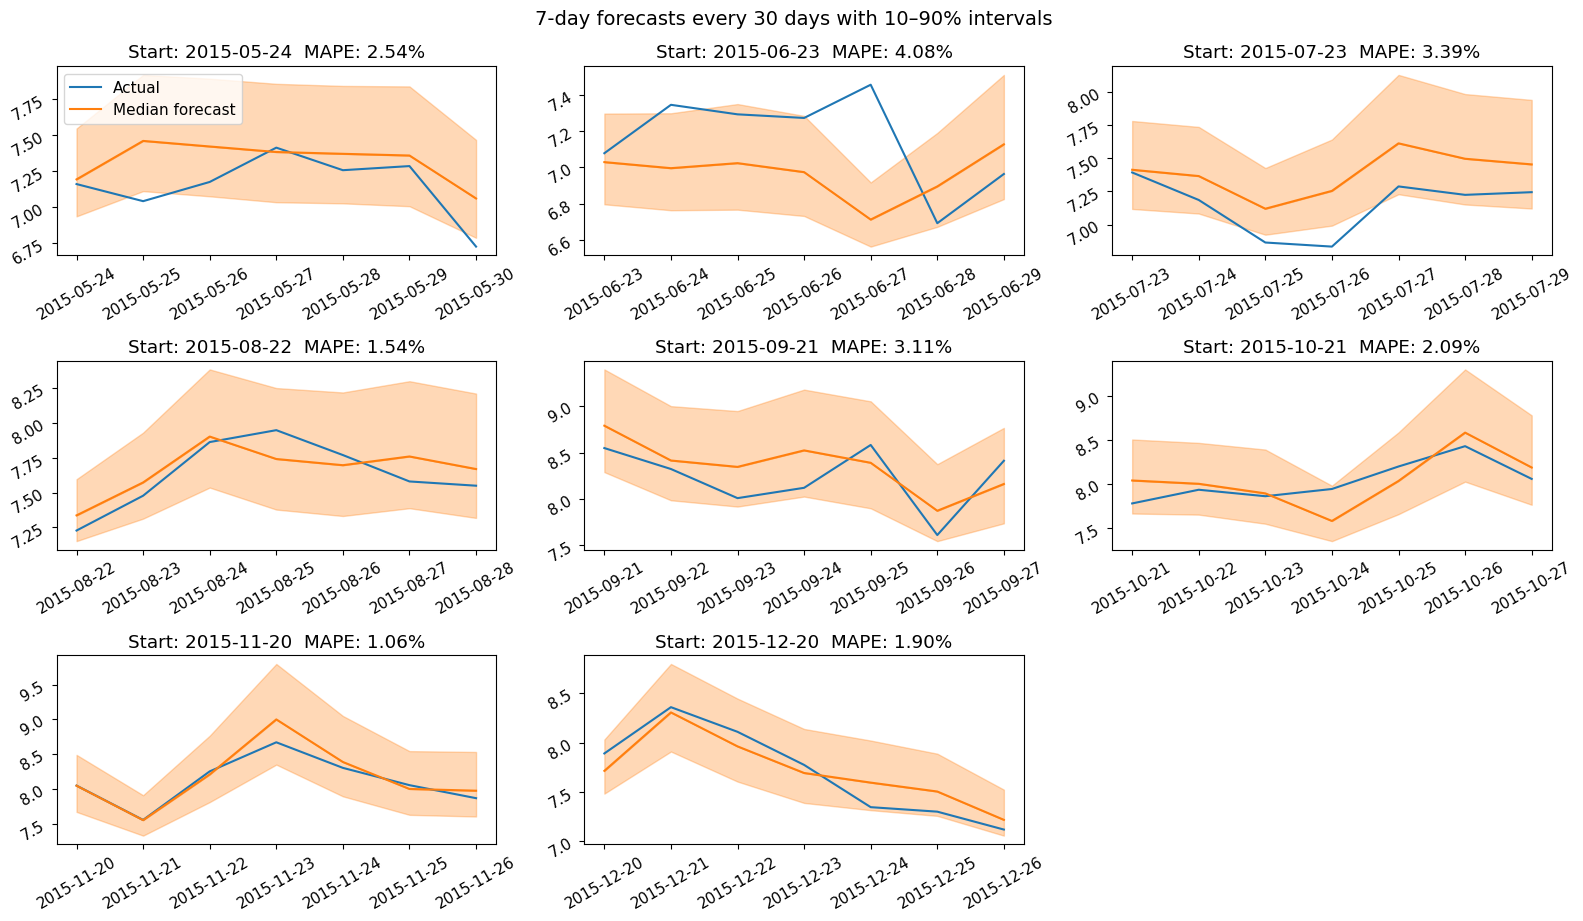

Average 7-day MAPE across windows: 2.46%


In [ ]:
# --- 2. kontenery na dane do wykresów ---
zs_mapes     = []
zs_forecasts = []  # każdy element: (ds, median, lower10, upper90)
zs_actuals   = []  # każdy element: (ds, actual_values)

# --- 3. pętla po datach startowych ---
for d in valid_starts:
    # a) historia do momentu d
    history = df_full[df_full['ds'] < d]
    # b) prognoza całego horizon (ale później weźmiemy tylko 7 dni)
    forecast_df = tfm_best.forecast_on_df(
        inputs=history,
        freq="1D",
        value_name="y",
        num_jobs=-1
    )
    # c) wycinek prognozy na kolejne 7 dni od d
    mask_fc = (
        (forecast_df['ds'] >= d) &
        (forecast_df['ds'] <  d + pd.Timedelta(days=7))
    )
    fc7 = forecast_df.loc[mask_fc].sort_values('ds').reset_index(drop=True)

    # d) faktyczne wartości w tych samych dniach
    mask_act = (
        (test_df['ds'] >= d) &
        (test_df['ds'] <  d + pd.Timedelta(days=7))
    )
    act7 = test_df.loc[mask_act].sort_values('ds').reset_index(drop=True)

    # e) wyciągamy kwantyle i medianę
    ds        = fc7['ds']
    lower10   = fc7['timesfm-q-0.1']
    median50  = fc7['timesfm-q-0.5']   # lub fc7['timesfm']
    upper90   = fc7['timesfm-q-0.9']

    # f) MAPE na medianie
    mape = mean_absolute_percentage_error(act7['y'], median50) * 100
    zs_mapes.append(mape)

    # g) zachowujemy do wykresu
    zs_forecasts.append((ds, median50, lower10, upper90))
    zs_actuals.append((act7['ds'], act7['y']))

# --- 4. rysowanie 3×3 subplotów z pasmami niepewności ---
plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 11})

for idx, ((ds_fc, med, l10, u90), (ds_act, y_act), start, mape) in enumerate(
    zip(zs_forecasts, zs_actuals, date_list, zs_mapes)
):
    ax = plt.subplot(3, 3, idx+1)
    # prawdziwe wartości
    ax.plot(ds_act, y_act,           label='Actual', color='C0')
    # mediana prognozy
    ax.plot(ds_fc,  med,             label='Median forecast', color='C1')
    # pasma niepewności
    ax.fill_between(ds_fc, l10, med, alpha=0.3, color='C1')
    ax.fill_between(ds_fc, med, u90, alpha=0.3, color='C1')

    ax.set_title(f"Start: {start.date()}  MAPE: {mape:.2f}%")
    ax.tick_params(labelrotation=30)
    if idx == 0:
        ax.legend(loc='upper left')

plt.tight_layout()
plt.suptitle("7-day forecasts every 30 days with 10–90% intervals", y=1.02, fontsize=14)
plt.show()

print(f"Average 7-day MAPE across windows: {sum(zs_mapes)/len(zs_mapes):.2f}%")


In [ ]:
win_len = 7
starts = pd.date_range(
    start=test_df['ds'].min(),
    end=test_df['ds'].max() - pd.Timedelta(days=win_len),
    freq=f"{win_len}D"
)

windows = []
for st in starts:
    win = test_df[
        (test_df['ds'] >= st) &
        (test_df['ds'] <  st + pd.Timedelta(days=win_len))
    ]
    if len(win) == win_len:
        windows.append(win)


In [ ]:
mapes = []
for win in windows:
    # historię masz do początku okna:
    history = df_full[df_full['ds'] < win['ds'].iloc[0]]

    # forecast zwróci horizon_len dni prognozy, ale wyciągniemy tylko pierwsze 7
    fc = tfm_best.forecast_on_df(
        inputs=history,
        freq="1D",
        value_name="y",
        num_jobs=-1
    )

    # wybieramy tylko daty w oknie 7-dniowym:
    fc_win = fc[fc['ds'].isin(win['ds'])]

    # scal i policz MAPE:
    merged = pd.merge(
        win[['ds','y']],
        fc_win[['ds','timesfm']],
        on='ds'
    )
    mape = mean_absolute_percentage_error(
        merged['y'], merged['timesfm']
    )
    mapes.append(mape)
print(f"Średni MAPE na 7-dniowych oknach: {sum(mapes)/len(mapes):.2%}")


Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.
Processing dataframe with multiple processes.


/usr/lib/python3.11/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.


KeyboardInterrupt: 

In [ ]:
!pip install gluonts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.2 MB/s eta 0:00:00


In [ ]:
train_df.to_csv("train.csv", index=False)
valid_df.to_csv("valid.csv", index=False)

In [ ]:
!git clone https://github.com/google-research/timesfm.git


Cloning into 'timesfm'...
remote: Enumerating objects: 897, done.
remote: Counting objects: 100% (421/421), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 897 (delta 322), reused 261 (delta 261), pack-reused 476 (from 1)
Receiving objects: 100% (897/897), 2.13 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (480/480), done.


In [ ]:
%cd timesfm
# jeśli używasz Colaba lub masz pip:
!pip install .[torch]


/content/timesfm
Processing /content/timesfm
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00
  Created wheel for tim

In [ ]:
!ls notebooks/
!jupyter nbconvert --to script notebooks/finetuning.ipynb


covariates.ipynb  finetuning.ipynb  finetuning_torch.ipynb
[NbConvertApp] Converting notebook notebooks/finetuning.ipynb to script
[NbConvertApp] Writing 11836 bytes to notebooks/finetuning.py


In [ ]:
%%bash
python notebooks/finetuning.py \
  --train_path   train.csv \
  --val_path     valid.csv \
  --checkpoint   google/timesfm-2.0-500m-pytorch \
  --batch_size   32 \
  --context_len  21 \
  --horizon_len  7 \
  --learning_rate 1e-4 \
  --max_epochs   5 \
  --output_dir   ./finetuned_model


 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0].


Traceback (most recent call last):
  File "/content/timesfm/notebooks/finetuning.py", line 21, in <module>
    from timesfm import patched_decoder
  File "/usr/local/lib/python3.11/dist-packages/timesfm/patched_decoder.py", line 25, in <module>
    from praxis import base_layer
ModuleNotFoundError: No module named 'praxis'


CalledProcessError: Command 'b'python notebooks/finetuning.py \\\n  --train_path   train.csv \\\n  --val_path     valid.csv \\\n  --checkpoint   google/timesfm-2.0-500m-pytorch \\\n  --batch_size   32 \\\n  --context_len  21 \\\n  --horizon_len  7 \\\n  --learning_rate 1e-4 \\\n  --max_epochs   5 \\\n  --output_dir   ./finetuned_model\n'' returned non-zero exit status 1.

In [ ]:
|from gluonts.dataset.pandas import PandasDataset
from gluonts.evaluation import make_evaluation_predictions
from sklearn.metrics import mean_absolute_percentage_error

# 1) Zakładamy, że masz już:
#   df_full: pełny DataFrame ze wszystkimi dniami (po reindexie/interpolacji)
#   train_df, valid_df, test_df: statyczny split 70/20/10 wg wskazań wyżej

# 2) Finetuning modelu na train + valid
tfm = timesfm.TimesFm(
    hparams=timesfm.TimesFmHparams(
        backend="gpu",
        per_core_batch_size=32,
        horizon_len=7,
        context_len=7*3,
        num_layers=50,
        use_positional_embedding=False,
    ),
    checkpoint=timesfm.TimesFmCheckpoint(
        huggingface_repo_id="google/timesfm-2.0-500m-pytorch"
    ),
)

# Ten krok „dopasowuje” model do Twoich danych historycznych
finetuned_predictor = tfm.finetune_on_df(
    train_df,
    valid_df,
    freq="1D",          # dzienna
    value_name="y",     # kolumna z targetem
    num_jobs=-1,
)

# 3) Przygotowanie listy dat, dla których będziemy wypuszczać backtest-owe prognozy
#    – tak jak u kolegi: co 30 dni, 9 kolejnych okien
start_date = df_full['ds'].iloc[ valid_end ]
# jeżeli valid_end to indeks podziału 70/90%
date_list = pd.date_range(start=start_date, periods=9, freq="30D").tolist()

# 4) Pętle backtest-owe: dla każdej daty d trenujemy na danych < d,
#    potem pobieramy prognozę na 7 dni (horizon_len)
finetune_forecasts = []
finetune_tss       = []
mapes = []

for d in date_list:
    # a) zbiór treningowy „do tej pory”
    train_up_to = df_full[df_full['ds'] < d].copy()
    # b) wycinek faktycznych wartości na kolejne 7 dni (test slice)
    subtest = df_full[
        (df_full['ds'] >= d) &
        (df_full['ds'] <  d + pd.Timedelta(days=7))
    ]

    # c) opakowanie GluonTS
    ds = PandasDataset(
        train_up_to,
        freq="1D",
        target="y",
        start=train_up_to['ds'].min()  # GluonTS wymaga start
    )

    # d) prognoza – zwraca generator (Forecast objects) i generator faktycznych Ts
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=[ds],
        predictor=finetuned_predictor,
        num_samples=20
    )

    # e) zbieramy wyniki
    f_list = list(forecast_it)  # długość==1, bo 1 uid
    t_list = list(ts_it)
    finetune_forecasts.append(f_list[0])
    finetune_tss.append(t_list[0])

    # f) punktowy MAPE na medianie prognozy
    median = f_list[0].quantile(0.5)  # pandas.Series z 7 dniami
    mape = mean_absolute_percentage_error(subtest['y'], median.values)
    mapes.append(mape)
    print(f"{d.date()} — MAPE: {mape:.2%}")


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

AttributeError: 'TimesFmTorch' object has no attribute 'finetune_on_df'

In [ ]:
prediction_length = 7
context_length    = prediction_length * 3  # =21
#num_samples       = 20
batch_size        = 64

tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=batch_size,
          horizon_len=prediction_length,
          num_layers=50,
          use_positional_embedding=False,
          context_len=context_length,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

torch_model.ckpt:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

In [ ]:
date_list = pd.date_range(df_full[valid_end:].index[60], periods=9, freq="30d").tolist()
print(date_list)
df_forecasts = []
mapes=[]

for d in date_list:
  print(d)
  train_df = df_full[df_full['ds'] < d].copy()
  subtest = test[(test['ds'] >= d) & (test['ds'] < d + pd.Timedelta(days=30))]

  forecast_df = tfm_eqr.forecast_on_df(
      inputs=train_df,
      freq="1D",  # day
      value_name="y",
      num_jobs=-1,
  )

  df_forecasts.append(forecast_df)
  forecast_subset = forecast_df[forecast_df['ds'].dt.date.isin(subtest['ds'].dt.date)]

  mape=mean_absolute_percentage_error(subtest['Open'], forecast_subset['timesfm'])
  print("MAPE: ", mape)
  mapes.append(mape)

[Timestamp('2015-06-03 00:00:00'), Timestamp('2015-07-03 00:00:00'), Timestamp('2015-08-02 00:00:00'), Timestamp('2015-09-01 00:00:00'), Timestamp('2015-10-01 00:00:00'), Timestamp('2015-10-31 00:00:00'), Timestamp('2015-11-30 00:00:00'), Timestamp('2015-12-30 00:00:00'), Timestamp('2016-01-29 00:00:00')]
2015-06-03 00:00:00


KeyError: 'ds'